In [1]:
from face_recognition import face_locations
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

import pandas as pd

## 1. Trying out face_recognition package

In [2]:
run_test = False

if run_test == True:
    # Download the image from the web
    urls = [
        'https://static.posters.cz/image/750/plakater/spring-forrest-i101995.jpg',
        'https://images.pexels.com/photos/1035671/pexels-photo-1035671.jpeg?cs=srgb&dl=pexels-anastasiya-lobanovskaya-1035671.jpg&fm=jpg'
        ]

    for i, url in enumerate(urls):
        print(f"Prediction {i}")
        response = requests.get(url)

        # Open the image using Pillow
        img = Image.open(BytesIO(response.content))

        # Convert the image to a numpy array
        img_array = np.asarray(img)

        # Find all the faces in the image
        print("prediction:", face_locations(img_array))

        # Show the image
        plt.imshow(img_array)
        plt.show()

        print()



## 2. Data exploring

In [3]:
# Read in all files from the dataset as dataframes.
list_eval_partition = pd.read_csv('../data/celeb_dataset/list_eval_partition.csv')
list_bbox_celeba = pd.read_csv('../data/celeb_dataset/list_bbox_celeba.csv')
list_landmarks_celeba = pd.read_csv('../data/celeb_dataset/list_landmarks_align_celeba.csv')
list_attr_celeba = pd.read_csv('../data/celeb_dataset/list_attr_celeba.csv')


display(list_eval_partition.head())
print("list_eval_partition.csv: \nRecommended partitioning of images into training, validation, testing sets. \
      \nImages 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing.\n\n")

display(list_bbox_celeba.head())
print('list_bbox_celeba.csv: \
      \nBounding box information for each image. "x_1" and "y_1" represent the upper left \
      \npoint coordinate of bounding box. "width" and "height" represent the width and height of bounding box\n\n')

display(list_landmarks_celeba.head())
print("list_landmarks_align_celeba.csv: \
      \nImage landmarks and their respective coordinates. There are 5 landmarks: \
      \nleft eye, right eye, nose, left mouth, right mouth\n\n")

display(list_attr_celeba.head())
print('list_attr_celeba.csv: \
      \nAttribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative\n\n')


image_id  partition
0  000001.jpg          0
1  000002.jpg          0
2  000003.jpg          0
3  000004.jpg          0
4  000005.jpg          0

list_eval_partition.csv: 
Recommended partitioning of images into training, validation, testing sets.       
Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing.




image_id  x_1  y_1  width  height
0  000001.jpg   95   71    226     313
1  000002.jpg   72   94    221     306
2  000003.jpg  216   59     91     126
3  000004.jpg  622  257    564     781
4  000005.jpg  236  109    120     166

list_bbox_celeba.csv:       
Bounding box information for each image. "x_1" and "y_1" represent the upper left       
point coordinate of bounding box. "width" and "height" represent the width and height of bounding box




image_id  lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  nose_y  \
0  000001.jpg         69        109         106         113      77     142   
1  000002.jpg         69        110         107         112      81     135   
2  000003.jpg         76        112         104         106     108     128   
3  000004.jpg         72        113         108         108     101     138   
4  000005.jpg         66        114         112         112      86     119   

   leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
0           73          152           108           154  
1           70          151           108           153  
2           74          156            98           158  
3           71          155           101           151  
4           71          147           104           150

list_landmarks_align_celeba.csv:       
Image landmarks and their respective coordinates. There are 5 landmarks:       
left eye, right eye, nose, left mouth, right mouth




image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  

[5 rows x 41 columns]

list_attr_celeba.csv:       
Attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative




In [4]:
# We are gonna focus on the attributes for now.

display(list_attr_celeba.head().T)

0           1           2           3  \
image_id             000001.jpg  000002.jpg  000003.jpg  000004.jpg   
5_o_Clock_Shadow             -1          -1          -1          -1   
Arched_Eyebrows               1          -1          -1          -1   
Attractive                    1          -1          -1           1   
Bags_Under_Eyes              -1           1          -1          -1   
Bald                         -1          -1          -1          -1   
Bangs                        -1          -1          -1          -1   
Big_Lips                     -1          -1           1          -1   
Big_Nose                     -1           1          -1          -1   
Black_Hair                   -1          -1          -1          -1   
Blond_Hair                   -1          -1          -1          -1   
Blurry                       -1          -1           1          -1   
Brown_Hair                    1           1          -1          -1   
Bushy_Eyebrows               -1          -1          -1          -1   
Chubby                       -1          -1          -1          -1   
Double_Chin                  -1          -1          -1          -1   
Eyeglasses                   -1          -1          -1          -1   
Goatee                       -1          -1          -1          -1   
Gray_Hair                    -1          -1          -1          -1   
Heavy_Makeup                  1          -1          -1          -1   
High_Cheekbones               1           1          -1          -1   
Male                         -1          -1           1          -1   
Mouth_Slightly_Open           1           1          -1          -1   
Mustache                     -1          -1          -1          -1   
Narrow_Eyes                  -1          -1           1          -1   
No_Beard                      1           1           1           1   
Oval_Face                    -1          -1          -1          -1   
Pale_Skin                    -1          -1          -1          -1   
Pointy_Nose                   1          -1           1           1   
Receding_Hairline            -1          -1          -1          -1   
Rosy_Cheeks                  -1          -1          -1          -1   
Sideburns                    -1          -1          -1          -1   
Smiling                       1           1          -1          -1   
Straight_Hair                 1          -1          -1           1   
Wavy_Hair                    -1          -1           1          -1   
Wearing_Earrings              1          -1          -1           1   
Wearing_Hat                  -1          -1          -1          -1   
Wearing_Lipstick              1          -1          -1           1   
Wearing_Necklace             -1          -1          -1           1   
Wearing_Necktie              -1          -1          -1          -1   
Young                         1           1           1           1   

                              4  
image_id             000005.jpg  
5_o_Clock_Shadow             -1  
Arched_Eyebrows               1  
Attractive                    1  
Bags_Under_Eyes              -1  
Bald                         -1  
Bangs                        -1  
Big_Lips                      1  
Big_Nose                     -1  
Black_Hair                   -1  
Blond_Hair                   -1  
Blurry                       -1  
Brown_Hair                   -1  
Bushy_Eyebrows               -1  
Chubby                       -1  
Double_Chin                  -1  
Eyeglasses                   -1  
Goatee                       -1  
Gray_Hair                    -1  
Heavy_Makeup                  1  
High_Cheekbones              -1  
Male                         -1  
Mouth_Slightly_Open          -1  
Mustache                     -1  
Narrow_Eyes                   1  
No_Beard                      1  
Oval_Face                    -1  
Pale_Skin                    -1  
Pointy_Nose                   1  
Receding_Hairline          

In [5]:
# !pip install sweetviz
import sweetviz as sv

skip_eda = True # if you dont want to use the eda.
in_notebook = True # whether you want to print in notebook or export as html.

if in_notebook == False and skip_eda == False:
    analysis.show_html(filepath='SWEETVIZ_REPORT.html', open_browser=True, layout='vertical', scale=None)
elif in_notebook == True and skip_eda == False:
    analysis.show_notebook(w=None, h=None, scale=None, layout='widescreen', filepath=None)

## 3. DataViz of Not Found - BEBA does this instead

In [6]:
# !pip install pickle4
import pickle

In [7]:
not_found = pickle.load( open( "../data/not_found.p", "rb" ) )
not_found_ids = []

for i in not_found:
    not_found_ids.append(i.name)


In [8]:
list_attr_celeba.head(5).T

0           1           2           3  \
image_id             000001.jpg  000002.jpg  000003.jpg  000004.jpg   
5_o_Clock_Shadow             -1          -1          -1          -1   
Arched_Eyebrows               1          -1          -1          -1   
Attractive                    1          -1          -1           1   
Bags_Under_Eyes              -1           1          -1          -1   
Bald                         -1          -1          -1          -1   
Bangs                        -1          -1          -1          -1   
Big_Lips                     -1          -1           1          -1   
Big_Nose                     -1           1          -1          -1   
Black_Hair                   -1          -1          -1          -1   
Blond_Hair                   -1          -1          -1          -1   
Blurry                       -1          -1           1          -1   
Brown_Hair                    1           1          -1          -1   
Bushy_Eyebrows               -1          -1          -1          -1   
Chubby                       -1          -1          -1          -1   
Double_Chin                  -1          -1          -1          -1   
Eyeglasses                   -1          -1          -1          -1   
Goatee                       -1          -1          -1          -1   
Gray_Hair                    -1          -1          -1          -1   
Heavy_Makeup                  1          -1          -1          -1   
High_Cheekbones               1           1          -1          -1   
Male                         -1          -1           1          -1   
Mouth_Slightly_Open           1           1          -1          -1   
Mustache                     -1          -1          -1          -1   
Narrow_Eyes                  -1          -1           1          -1   
No_Beard                      1           1           1           1   
Oval_Face                    -1          -1          -1          -1   
Pale_Skin                    -1          -1          -1          -1   
Pointy_Nose                   1          -1           1           1   
Receding_Hairline            -1          -1          -1          -1   
Rosy_Cheeks                  -1          -1          -1          -1   
Sideburns                    -1          -1          -1          -1   
Smiling                       1           1          -1          -1   
Straight_Hair                 1          -1          -1           1   
Wavy_Hair                    -1          -1           1          -1   
Wearing_Earrings              1          -1          -1           1   
Wearing_Hat                  -1          -1          -1          -1   
Wearing_Lipstick              1          -1          -1           1   
Wearing_Necklace             -1          -1          -1           1   
Wearing_Necktie              -1          -1          -1          -1   
Young                         1           1           1           1   

                              4  
image_id             000005.jpg  
5_o_Clock_Shadow             -1  
Arched_Eyebrows               1  
Attractive                    1  
Bags_Under_Eyes              -1  
Bald                         -1  
Bangs                        -1  
Big_Lips                      1  
Big_Nose                     -1  
Black_Hair                   -1  
Blond_Hair                   -1  
Blurry                       -1  
Brown_Hair                   -1  
Bushy_Eyebrows               -1  
Chubby                       -1  
Double_Chin                  -1  
Eyeglasses                   -1  
Goatee                       -1  
Gray_Hair                    -1  
Heavy_Makeup                  1  
High_Cheekbones              -1  
Male                         -1  
Mouth_Slightly_Open          -1  
Mustache                     -1  
Narrow_Eyes                   1  
No_Beard                      1  
Oval_Face                    -1  
Pale_Skin                    -1  
Pointy_Nose                   1  
Receding_Hairline          

In [9]:
import seaborn as sns

array([[<AxesSubplot: title={'center': '5_o_Clock_Shadow'}>,
        <AxesSubplot: title={'center': 'Arched_Eyebrows'}>,
        <AxesSubplot: title={'center': 'Attractive'}>,
        <AxesSubplot: title={'center': 'Bags_Under_Eyes'}>,
        <AxesSubplot: title={'center': 'Bald'}>,
        <AxesSubplot: title={'center': 'Bangs'}>],
       [<AxesSubplot: title={'center': 'Big_Lips'}>,
        <AxesSubplot: title={'center': 'Big_Nose'}>,
        <AxesSubplot: title={'center': 'Black_Hair'}>,
        <AxesSubplot: title={'center': 'Blond_Hair'}>,
        <AxesSubplot: title={'center': 'Blurry'}>,
        <AxesSubplot: title={'center': 'Brown_Hair'}>],
       [<AxesSubplot: title={'center': 'Bushy_Eyebrows'}>,
        <AxesSubplot: title={'center': 'Chubby'}>,
        <AxesSubplot: title={'center': 'Double_Chin'}>,
        <AxesSubplot: title={'center': 'Eyeglasses'}>,
        <AxesSubplot: title={'center': 'Goatee'}>,
        <AxesSubplot: title={'center': 'Gray_Hair'}>],
       [<AxesS

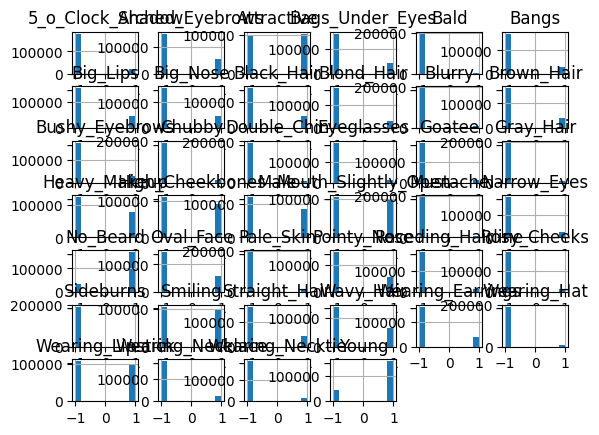

In [10]:
list_attr_celeba.hist()

## 4. SHAP

In [11]:
not_found = pickle.load( open( "../data/not_found.p", "rb" ) )
not_found_ids = []

for i in not_found:
    not_found_ids.append(i.name)

attr = pd.DataFrame([not_found_ids]).T
attr['Recognized'] = -1
 
attr = pd.merge(list_attr_celeba, attr, left_on='image_id', right_on=0, how='left').drop(columns=0)
attr.iloc[:,-1].replace(np.nan, 1, inplace=True)
attr['Recognized'] = attr['Recognized'].astype('int64')

attr.replace(-1, 0, inplace=True)

attr.head(5).T

# Count the number of 1's for each attribute
attr.iloc[:,1:].sum(axis=0).sort_values(ascending=True)

Bald                     4547
Mustache                 8417
Gray_Hair                8499
Pale_Skin                8701
Double_Chin              9459
Wearing_Hat              9818
Blurry                  10312
Sideburns               11449
Chubby                  11663
Goatee                  12716
Eyeglasses              13193
Rosy_Cheeks             13315
Wearing_Necktie         14732
Receding_Hairline       16163
5_o_Clock_Shadow        22516
Narrow_Eyes             23329
Wearing_Necklace        24913
Bushy_Eyebrows          28803
Blond_Hair              29983
Bangs                   30709
Wearing_Earrings        38276
Bags_Under_Eyes         41446
Brown_Hair              41572
Straight_Hair           42222
Big_Nose                47516
Black_Hair              48472
Big_Lips                48785
Arched_Eyebrows         54090
Pointy_Nose             56210
Oval_Face               57567
Wavy_Hair               64744
Heavy_Makeup            78390
Male                    84434
High_Cheek

In [12]:


# IDEA FROM CHAT

# import face_recognition
import shap
# # import numpy as np
# # import pandas as pd
# # from sklearn.ensemble import RandomForestClassifier

# # # Load the image file
# # image = face_recognition.load_image_file("path/to/image.jpg")

# # # Create a face recognition model
# # model = face_recognition.api.face_encodings(image)

# # # Load the physical attributes dataset
# # df = pd.read_csv("path/to/physical_attributes.csv")

# # Train a random forest classifier to predict face recognition from physical attributes
# X = attr.drop(columns=["image_id", "Recognized"]).values
# y = df["Recognized"]
# clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X, y)

# # Convert the classifier to a scikit-learn compatible estimator
# class FaceRecognitionModel:
#     def predict(self, X):
#         model_output = face_recognition.api.face_distance(model, X)
#         predicted_labels = clf.predict_proba(X)[:, 1]
#         return predicted_labels

# # Initialize the SHAP explainer with the face recognition model
# explainer = shap.Explainer(FaceRecognitionModel())

# # Calculate the SHAP values for the physical attributes
# shap_values = explainer(X)

In [13]:
for i in attr.iloc[:3,:].values:
    print(type(i))
    print(i[0])

<class 'numpy.ndarray'>
000001.jpg
<class 'numpy.ndarray'>
000002.jpg
<class 'numpy.ndarray'>
000003.jpg


In [14]:
from pathlib import Path
import face_recognition

class FaceRecognitionModel:
    def predict(self, X):

        y_pred = []

        for i in X:

            # Image name from features
            image_name = i[0]

            # Load the image file
            path = Path('../data/celeb_dataset/img_align_celeba/img_align_celeba')
            image_path = path / image_name
            image = face_recognition.load_image_file(image_path)

            # Try to recognize the face
            face_loc = face_recognition.face_locations(image)
            
            if len(face_loc) == 0:
                y_pred.append(0)
            else:
                y_pred.append(1)
        
        return np.array(y_pred)

model = FaceRecognitionModel()
model.predict(attr.iloc[:3,:].values)

array([1, 1, 0])

**SHAP values**

We tried with SHAP values to see if it could be used for calculating the influence of the latent features. 

Since SHAP works by masking features and in that way calculate their influence, this didnt work. 

In [15]:
attr

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                 0                1           1   
1       000002.jpg                 0                0           0   
2       000003.jpg                 0                0           0   
3       000004.jpg                 0                0           1   
4       000005.jpg                 0                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                 0                0           1   
202595  202596.jpg                 0                0           0   
202596  202597.jpg                 0                0           0   
202597  202598.jpg                 0                1           1   
202598  202599.jpg                 0                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                     0     0      0         0         0           0  ...   
1                     1     0      0         0         1           0  ...   
2                     0     0      0         1         0           0  ...   
3                     0     0      0         0         0           0  ...   
4                     0     0      0         1         0           0  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594                0     0      0         1         0           0  ...   
202595                0     0      1         1         0           0  ...   
202596                0     0      0         0         0           1  ...   
202597                0     0      0         1         0           1  ...   
202598                0     0      0         0         0           0  ...   

        Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  \
0             1              1          0                 1            0   
1             1              0          0                 0            0   
2             0              0          1                 0            0   
3             0              1          0                 1            0   
4             0              0          0                 0            0   
...         ...            ...        ...               ...          ...   
202594        0              0          0                 0            0   
202595        1              1          0                 0            0   
202596        1              0          0                 0            0   
202597        1              0          1                 1            0   
202598        0              0          1                 0            0   

        Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  Young  Recognized  
0                      1                 0                0      1           1  
1                      0                 0                0      1           1  
2                      0                 0                0      1           0  
3                      1                 1                0      1           0  
4                      1                 0                0      1           1  
...                  ...               ...              ...    ...         ...  
202594                 1                 0                0      1           1  
202595                 0                 0                0      1           1  
202596                 0                 0                0      1           1  
202597                 1                 0                0      1           1  
202598                 1                 0                0      1           1  

[202599 rows x 42 columns]

In [16]:
import shap

# X is all the attributes except the last column (Recognized)
X = attr.iloc[:, 1:-1].values
y = attr.iloc[:, -1].values
y_true = [1]*len(X)

# Initialize the SHAP explainer with the face recognition model
# explainer = shap.KernelExplainer(model.predict, X)

# Calculate the SHAP values for the physical attributes
# shap_v = explainer.shap_values(X)

In [17]:
type(y[1])

numpy.int64

**LIME (Local Interpretable Model-Agnostic Explanations)**

Or something like it. 

We want to try to create a DT classifier to find latent variables to the predicted output. In that way to check if there are any latent variables that might contribute to recognizing a face or not.

1. Without balancing data

In [18]:
# In order to investigate the influnce of different latent features on the face recognition model,
# we will try to train a decision tree classifier on the latent features and the output of the face recognition model.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

random_state = 42

X = attr.iloc[:, 1:-1].values
y = attr.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

clf = DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train)
y_dt_pred = clf.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_dt_pred))

Accuracy score:  0.953923988153998


2. Balancing data, so there are an equal amount of recognized / not recognized faces in the training data

In [19]:
def balance_data(df):
    label1 = df[df['Recognized'] == 0].values
    label2 = df[df['Recognized'] == 1].iloc[:label1.shape[0], :].values

    balanced = np.concatenate((label1, label2), axis=0)

    X = balanced[:, 1:-1].astype('int64')
    y = balanced[:, -1].astype('int64')

    return X, y

# def balance_data(X, y):
#     label1 = np.concatenate((X[y == 0], y[y == 0].reshape(-1, 1)), axis=1)
#     label2 = np.concatenate((X[y == 1], y[y == 1].reshape(-1, 1)), axis=1)[:label1.shape[0]]

#     balanced = np.concatenate((label1, label2), axis=0)

#     X_balanced = balanced[:, :-1].astype('int64')
#     y_balanced = balanced[:, -1].astype('int64')

#     return X_balanced, y_balanced

X_balanced, y_balanced = balance_data(attr)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=random_state, stratify=y_balanced)

clf = DecisionTreeClassifier(random_state=random_state,
                             max_depth = 15,
                             min_samples_split = 5,
                             min_samples_leaf = 20,
                             ).fit(X_train, y_train)
y_dt_pred = clf.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_dt_pred))

Accuracy score:  0.7927807486631016


Trying to use gridsearch to find better params for the DT classifier.

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10, 20],
    'max_features': [None, 'sqrt', 5, 10]
}

# Create the decision tree classifier
dtc = DecisionTreeClassifier(random_state=random_state)

# Create the grid search object
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters: ", grid_search.best_params_)

# Using these params to train the model
clf = DecisionTreeClassifier(random_state=random_state,
                             **grid_search.best_params_
                             ).fit(X_train, y_train)

y_dt_pred = clf.predict(X_test)

# Print accuracy of both train and test set:
print("Accuracy score on train: ", accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy score on test: ", accuracy_score(y_test, y_dt_pred))

Best parameters:  {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 5}
Accuracy score on train:  0.8094495208379764
Accuracy score on test:  0.7927807486631016


In [ ]:
# Use the decision tree classifier to check the importance of each latent feature
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feat_name = attr.columns[1:-1]

# Set a threshold for the maximum length of a feature name
max_feat_name_length = 15

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    feat_name_formatted = feat_name[f] + "\t" if len(feat_name[f]) < max_feat_name_length else feat_name[f]
    print("%d. feat. %d \t%s \t(%f)" % (f + 1, indices[f], feat_name_formatted, importances[indices[f]]))


Feature ranking:
1. feat. 19 	5_o_Clock_Shadow 	(0.349538)
2. feat. 2 	Arched_Eyebrows 	(0.148982)
3. feat. 35 	Attractive	 	(0.093751)
4. feat. 1 	Bags_Under_Eyes 	(0.076115)
5. feat. 0 	Bald	 	(0.037912)
6. feat. 38 	Bangs	 	(0.037467)
7. feat. 12 	Big_Lips	 	(0.032764)
8. feat. 36 	Big_Nose	 	(0.026245)
9. feat. 25 	Black_Hair	 	(0.025025)
10. feat. 31 	Blond_Hair	 	(0.018960)
11. feat. 5 	Blurry	 	(0.018637)
12. feat. 3 	Brown_Hair	 	(0.018212)
13. feat. 18 	Bushy_Eyebrows	 	(0.013050)
14. feat. 15 	Chubby	 	(0.012238)
15. feat. 10 	Double_Chin	 	(0.011779)
16. feat. 32 	Eyeglasses	 	(0.009687)
17. feat. 14 	Goatee	 	(0.008333)
18. feat. 20 	Gray_Hair	 	(0.008096)
19. feat. 7 	Heavy_Makeup	 	(0.006940)
20. feat. 6 	High_Cheekbones 	(0.006079)
21. feat. 30 	Male	 	(0.006007)
22. feat. 8 	Mouth_Slightly_Open 	(0.005821)
23. feat. 21 	Mustache	 	(0.005650)
24. feat. 33 	Narrow_Eyes	 	(0.003870)
25. feat. 39 	No_Beard	 	(0.003503)
26. feat. 27 	Oval_Face	 	(0.003396)
27. feat. 23 	Pale

In [ ]:
# visualize the decision tree with dtreeviz.trees
# from dtreeviz.trees import dtreeviz

# before, on mac:
# brew install graphviz
# test in cmd: dot -V

create_dtree = False

if create_dtree:
    import dtreeviz
    import graphviz.backend as be

    viz = dtreeviz.model(clf,
                    X_train,
                    y_train,
                    # target_name='Recognized',
                    # feature_names=feat_name,
                    # class_names=['Not recognized', 'Recognized'],
                    # orientation='TD',
                    # fancy=True,
                    # X=None,
                    # label_fontsize=12,
                    # ticks_fontsize=8,
                    )

    viz.view()